<a target="_blank" href="https://colab.research.google.com/github/olivierSorba/iens2024labs/blob/main/essay_writer.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Essay Writer 
- (adapted from <https://www.deeplearning.ai/short-courses/ai-agents-in-langgraph/> and <https://github.com/langchain-ai/langgraphjs/tree/main/examples>)

## setup

- run this if working from Google Colab

In [ ]:
# ! pip install -U cryptography gradio python-dotenv tavily-python  langchain==0.3.0	 langchain-community==0.3.0	 langchain-core==0.3.0	 langgraph>=0.2.20	 langchain-mistralai==0.2.0	 langchain-openai==0.2.0	 langgraph-checkpoint-sqlite

- get our credentials
- uncomment next cell, run once, fill password, run again

In [ ]:
# %load ./credentials_cell.py
import os
import base64
from cryptography.fernet import Fernet
from io import StringIO
import base64, hashlib
data = "gAAAAABnNMzMiY09zC7QtY2VTLLH1w9OfEE1Aqfo-p-M9233YGr0p54f29c21JXAHyf40tZIM5k6j3iWucq2ScoMRXqBlYrTI9dGAkG1OkBkMewSrutqBdCzMxmYoluVGNMd5UiVtTiYMbIRUJ0ctRQTkJDtEHZ56GiMyQvV0HuGpi8imaNSkXI3haVjI3YDMpJDK6b9XkMPoOa51m6bMq4qrZWZ5ICkOvR_3nAS26_oLSA3NkSM2vdr_YBO6LF2oFsrXeU_WJKeFwPof4RQH-UlB_zgoZH4R9NrrM8Zg-DzCpHiE8ZHCJngDllYqaXVqA0x2_8rCWMvgzJktLhuGtlDvvalpaKntEu5B7XH01M6skx34j61OQlyuzuqMc0Bf_PNDT_ZJkbfDks6iByaXxL9jaiScQX_IA_O7733HAGU0QRe7haRBo3CISN7BoLyMrYoZfFwiurzTH-FYh1cHI7W1JhO1S8ULydJ9UjSaARGHZVzsEA325LfISLzGfvkzHdDhI2pAHt3ZZigDeND8zew3jvGCZevW6riAb9KNvlPy3-WxuWbdVoxaCq23jFfNSDF2YCWXasyEnnYAIfYOnRhYSodp7mJ1CrEJ_UgoI5iCjM2-GulADFlvfhdqgnYe68l1WHOaD3iGweXX4ttlr_lXRlATu2iDUrfr6-xdCuTVNT7ncLV4TH_hArd5qL-Y6tUgUqzlVh1Y0Y_KsbMmGu6l2Jj-6fzwWyL0Xe2_bQMv2rgdkc4UzlwgHI9ccFJJN--2vIrS9iSVKWyJq_kDLvXWcoLimok0oR4wN5ttW3RdPbgmSYsb62YVSyg5BURx92BZvRbJDXZHKO_Dmcnia73vQuSV3vYh2Hv6933VcEihL6xZ6tBAe9IxG8v2vxbpNbuBmoQHaQNBCnQwpTpj_K90-UrnRTsp8lpwArHaNYTtT0CgMs4oGxSeKpOA56hu4LPOeenA0eQPCtjbF_Xz7Ww8YXR-Bg1rkZ8zgtxFUBfTt8FaB_5nrHWX0LMlu71Z6R4oBgTHy5SqFUQ_KUWVRhDrHR_-fO7PJ9EDuuuMCTV056fJ6n4jLX-vbHc830s_vAANOBtBmnLQAjVQaRaseOR5bnrL2-hpYU2fv63bYpB97FmJzStLPSYrwa_8D62uFvvFz52yT6OpyTwOhFaErktQQSrpK-8xnzZFRjvUWo38XICs4fRWmNOeMAaPgaL9VB2PFrHGS_Uy337MkEmtjAjW-APyXkRmCwxcejFFnoouIX2ZzGfsYaJpCXRU3GI7R8lKUg2Ys9v3i95l5w7nnzG6ydmaJKWi7MW0-BkVCCS2myoXj7ytxHnXHUhED1Yqpm8XdLff0D4wfJ7H6lCcsyzsD4h5PNPy0Pq22ZSeTx8oup3P-1ZLab_pM7Bu2E1gnNc2EzO7lc9IsZOBRIRyoQvqma28jbLBZ39Qw0ETbZmuuaBzRZIOR5xFXuKDLOfJnU1DplzkqWLSduk70SlmWZjQUYF41MLwVE2o3uooptIlFTzWm4k1hvsFtHotGHPFwT6qomYL88a251oE1FzEALmjxD4L6V81D6vbYI7krdQEKFkeJONBGc3a6wtNGzrGVzbykf5PFJP80ncIyUTRpqaz0DhrOzLLr2SHy0Kz9fuTFHhxknmc1HCBr4pKLvRcxROaMtxU0C5EzbapCUuQTRmQ8aMdoRj-A3j_vAyk5m0WTw6YuPSYbG2GOvCtlxhIBgK16_o-6dToPlZ_VOv3RuqnQ8xhZdHBg=="
password= "........."        
    
def load_with_password(data:str, password:str)->bool:
    key = hashlib.md5(password.encode()).hexdigest()
    key = base64.urlsafe_b64encode(key.encode()).decode()
    stream=StringIO(Fernet(key).decrypt(data).decode())
    for k,v in [ l.split("=",1) for l in stream.read().splitlines() if '=' in l]:
        os.environ[k]=v
        
        
load_with_password(data, password=password)

- import relevant libraries

In [3]:
import operator
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, AIMessage, ChatMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import StateGraph, END
from pydantic import BaseModel
from tavily import TavilyClient
from typing import TypedDict, Annotated, List


## Building the Graph

### The state that will be passed from node to node

In [4]:
class AgentState(TypedDict):
    task: str
    plan: str
    draft: str
    critique: str
    content: List[str]
    revision_number: int
    max_revisions: int

### Building the nodes

#### Choose a LLM

In [5]:
model = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

#### Sytem prompt for the nodes 
- i.e. personnalities that will be passed to the LLM

In [6]:
PLAN_PROMPT = """You are an expert writer tasked with writing a high level outline of an essay. \
Write such an outline for the user provided topic. Give an outline of the essay along with any relevant notes \
or instructions for the sections."""

In [7]:
WRITER_PROMPT = """You are an essay assistant tasked with writing excellent 5-paragraph essays.\
Generate the best essay possible for the user's request and the initial outline. \
If the user provides critique, respond with a revised version of your previous attempts. \
Utilize all the information below as needed: 

------

{content}"""

In [8]:
REFLECTION_PROMPT = """You are a teacher grading an essay submission. \
Generate critique and recommendations for the user's submission. \
Provide detailed recommendations, including requests for length, depth, style, etc."""

In [9]:
RESEARCH_PLAN_PROMPT = """You are a researcher charged with providing information that can \
be used when writing the following essay. Generate a list of search queries that will gather \
any relevant information. Only generate 3 queries max."""


In [10]:
RESEARCH_CRITIQUE_PROMPT = """You are a researcher charged with providing information that can \
be used when making any requested revisions (as outlined below). \
Generate a list of search queries that will gather any relevant information. Only generate 3 queries max."""


#### Web utilities

- first an object representing the result of a web search

In [ ]:
class Queries(BaseModel):
    queries: List[str]

- And an object to conduct a web search

In [12]:
tavily = TavilyClient(api_key=os.environ["TAVILY_API_KEY"])

#### Functions defining what how each node will update the graph state

In [13]:
def plan_node(state: AgentState):
    messages = [
        SystemMessage(content=PLAN_PROMPT), 
        HumanMessage(content=state['task'])
    ]
    response = model.invoke(messages)
    return {"plan": response.content}

In [14]:
def research_plan_node(state: AgentState):
    queries = model.with_structured_output(Queries).invoke([
        SystemMessage(content=RESEARCH_PLAN_PROMPT),
        HumanMessage(content=state['task'])
    ])
    print(state)
    content = state['content'] if 'content' in state else []
    for q in queries.queries:
        response = tavily.search(query=q, max_results=2)
        for r in response['results']:
            content.append(r['content'])
    return {"content": content}

In [15]:
def generation_node(state: AgentState):
    content = "\n\n".join(state['content'] or [])
    user_message = HumanMessage(
        content=f"{state['task']}\n\nHere is my plan:\n\n{state['plan']}")
    messages = [
        SystemMessage(
            content=WRITER_PROMPT.format(content=content)
        ),
        user_message
        ]
    response = model.invoke(messages)
    return {
        "draft": response.content, 
        "revision_number": state.get("revision_number", 1) + 1
    }


In [16]:
def reflection_node(state: AgentState):
    messages = [
        SystemMessage(content=REFLECTION_PROMPT), 
        HumanMessage(content=state['draft'])
    ]
    response = model.invoke(messages)
    return {"critique": response.content}

In [17]:
def research_critique_node(state: AgentState):
    queries = model.with_structured_output(Queries).invoke([
        SystemMessage(content=RESEARCH_CRITIQUE_PROMPT),
        HumanMessage(content=state['critique'])
    ])
    content = state['content'] or []
    for q in queries.queries:
        response = tavily.search(query=q, max_results=2)
        for r in response['results']:
            content.append(r['content'])
    return {"content": content}

- this node defines where to go next on the fly. It will be associated to a 'conditional edge'

In [18]:
def should_continue(state):
    if state["revision_number"] > state["max_revisions"]:
        return END
    return "reflect"

### Gather the nodes in a graph

In [19]:
builder = StateGraph(AgentState)
# "planner" is the name of the node, plan_node is the function that will be called on activation
builder.add_node("planner", plan_node)
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_node("research_plan", research_plan_node)
builder.add_node("research_critique", research_critique_node)


### Define the flow in the grap
- entry point, exit point and edges

- entry point

In [20]:
# this is the node where we start
builder.set_entry_point("planner")

- conditional edge(s)

In [21]:
builder.add_conditional_edges(
    "generate", 
    should_continue, 
    {END: END, "reflect": "reflect"}
)


- simple direct edges

In [22]:
builder.add_edge("planner", "research_plan")
builder.add_edge("research_plan", "generate")

builder.add_edge("reflect", "research_critique")
builder.add_edge("research_critique", "generate")

### Adding memory to the graph

- a database-like object to store the successive states of the graph

In [23]:
memory = SqliteSaver.from_conn_string(":memory:")

### Put it all together

In [24]:
with SqliteSaver.from_conn_string(":memory:") as checkpointer:
    graph = builder.compile(checkpointer=checkpointer)

- the graph is ready

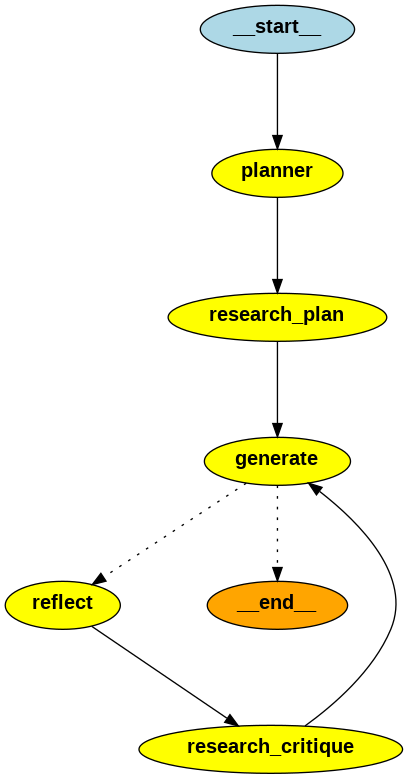

In [25]:
from IPython.display import Image

Image(graph.get_graph().draw_png())

## Running the graph

- and print the messages generated by the nodes

In [48]:
with SqliteSaver.from_conn_string(":memory:") as checkpointer:
    graph = builder.compile(checkpointer=None)
    config = {"configurable": {"thread_id": "1"}}
    for u in graph.stream({
        #'task': "what is the difference between langchain and langsmith",
        'task': "Write an essay on why Donald Trump won in november 2024",
        "max_revisions": 1,
        "revision_number": 1,
    }, config = config):
        for (n,s) in u.items():
            print(f"{n}:")
            for k,v in s.items():
                print(k)
                print(v)
            print("="*20)

planner:
plan
I. Introduction
    A. Brief overview of the 2024 presidential election
    B. Thesis statement: Analyzing the factors that contributed to Donald Trump's victory in November 2024

II. Political Landscape Leading to the 2024 Election
    A. Overview of the political climate in the United States
    B. Key issues and events leading up to the election
    C. Trump's political career and previous presidency

III. Factors Contributing to Trump's Victory
    A. Appeal to his base and loyal supporters
    B. Campaign strategies and messaging
    C. Economic policies and promises
    D. Handling of key issues such as national security, immigration, and healthcare

IV. Opposition and Challenges Faced by Trump
    A. Criticisms and controversies surrounding Trump
    B. Democratic candidate and their campaign
    C. External factors influencing the election outcome

V. Analysis of the Election Results
    A. Key demographics and voting patterns
    B. Swing states and their impact 

In [55]:
# u containe the last update to the graph, issues 
for n,u in u.items():
    print(k)
    for k,v in u.items():
        print(f"{k}:")
        print(v)


generate
draft:
In November 2024, Donald Trump secured a surprising victory in the presidential election, marking a significant political comeback. This essay will delve into the various factors that contributed to Trump's win, analyzing the political landscape, campaign strategies, key issues, opposition faced, election results, and the implications of his victory for the United States.

The political climate leading up to the 2024 election was tumultuous, with a divided nation grappling with key issues such as national security, immigration, and healthcare. Donald Trump, a controversial figure with a previous presidency, capitalized on his base and loyal supporters, leveraging his campaign strategies and messaging to appeal to a wide range of voters. His economic policies and promises resonated with many Americans, promising a change in leadership amidst dissatisfaction with the country's direction.

Despite facing criticisms and controversies, Trump's campaign successfully navigated

In [51]:
print(list(u.items()))

[('generate', {'draft': "In November 2024, Donald Trump secured a surprising victory in the presidential election, marking a significant political comeback. This essay will delve into the various factors that contributed to Trump's win, analyzing the political landscape, campaign strategies, key issues, opposition faced, election results, and the implications of his victory for the United States.\n\nThe political climate leading up to the 2024 election was tumultuous, with a divided nation grappling with key issues such as national security, immigration, and healthcare. Donald Trump, a controversial figure with a previous presidency, capitalized on his base and loyal supporters, leveraging his campaign strategies and messaging to appeal to a wide range of voters. His economic policies and promises resonated with many Americans, promising a change in leadership amidst dissatisfaction with the country's direction.\n\nDespite facing criticisms and controversies, Trump's campaign successfu

## See a production-like interface

- easier to launch from [this deaplearning.ai page](https://learn.deeplearning.ai/courses/ai-agents-in-langgraph/lesson/7/essay-writer)
- e.g. https://7faa06b9d71c545102.gradio.live

In [6]:
import warnings
warnings.filterwarnings("ignore")

from essay_writer_helper import ewriter, writer_gui
MultiAgent = ewriter()
app = writer_gui(MultiAgent.graph)
app.launch(server_port=None, share =True)

* Running on local URL:  http://0.0.0.0:7861
* Running on public URL: https://239f56b47ef930df21.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
